In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import networkx as nx

#import sys
#sys.path.append(r"C:\Users\salva\PycharmProjects\SpreadPy")
#path = r"C:\Users\salva\PycharmProjects\SpreadPy\\"

from SpreadPy import IOUtils
from SpreadPy import AnalyticalUtils
from SpreadPy.Models.models import *

import matplotlib.pyplot as plt
%matplotlib inline

## Build the Multiplex Graph as a Networkx Object

In [3]:
io = IOUtils()

#folder = path+'toy_data/mental_lexicon_2/'
folder = 'toy_data/mental_lexicon_2/'
g_multiplex, layer_names = io.read_example_mental_lexicon(folder)

In [4]:
layer_names

['FreeAssociations', 'PhonSimilarities']

In [5]:
'N', g_multiplex.number_of_nodes(), 'E', g_multiplex.number_of_edges()

('N', 17039, 'E', 72588)

In [6]:
g_multiplex.edges['world','globe']

{'layer': ['FreeAssociations']}

In [7]:
g_multiplex.edges['alone','lone']['layer']

['FreeAssociations', 'PhonSimilarities']

# Use the layer(s) you prefer

In [8]:
utils = AnalyticalUtils(g_multiplex)

In [9]:
g_sem = utils.graph_for_layers(layer_names=['FreeAssociations'])
'N', g_sem.number_of_nodes(), 'E', g_sem.number_of_edges()

('N', 11534, 'E', 36388)

In [10]:
largest_component = max(nx.connected_components(g_sem), key=len)
lcc_sem = g_sem.subgraph(largest_component)
lcc_sem = lcc_sem.copy()

'N', lcc_sem.number_of_nodes(), 'E', lcc_sem.number_of_edges()

('N', 11512, 'E', 36375)

In [11]:
g_phon = utils.graph_for_layers(layer_names=['PhonSimilarities'])
'N', g_phon.number_of_nodes(), 'E', g_phon.number_of_edges()

('N', 12195, 'E', 36448)

In [12]:
largest_component = max(nx.connected_components(g_phon), key=len)
lcc_phon = g_phon.subgraph(largest_component)
lcc_phon = lcc_phon.copy()

'N', lcc_phon.number_of_nodes(), 'E', lcc_phon.number_of_edges()

('N', 8029, 'E', 33610)

# Largest Viable Component

In [13]:
lvc_nodes = utils.lvc(layer_names)
len(lvc_nodes)

4118

In [14]:
to_rem = list(set(g_multiplex.nodes())^set(lvc_nodes))
g_multiplex.remove_nodes_from(to_rem)

'N', g_multiplex.number_of_nodes(), 'E', g_multiplex.number_of_edges()

('N', 4118, 'E', 26229)

In [15]:
g_sem = utils.graph_for_layers(layer_names=['FreeAssociations'])
'N', g_sem.number_of_nodes(), 'E', g_sem.number_of_edges()

('N', 4118, 'E', 10567)

In [16]:
#g_phon = utils.graph_for_layers(layer_names=['phonology'])
g_phon = utils.graph_for_layers(layer_names=['PhonSimilarities'])
'N', g_phon.number_of_nodes(), 'E', g_phon.number_of_edges()

('N', 4118, 'E', 15876)

# Base Spreading Activation (Semantic Layer)

In [17]:
model = BaseSpreading(g_sem,
                      retention=0.7, decay=0, suppress=0,
                      weighted=False
                     )

################### INITIAL SETTING ##############
initial_active_nodes = ['be']
initial_status = {node: 100 if node in initial_active_nodes else 0 for node in g_multiplex.nodes}
model.status = initial_status
time = 20
##################################################

results = model.iteration_bunch(time)

final_status = results[-1]['status']
ranked_results = model.rank_status_activation(final_status)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 131.89it/s]


Output the top-k most activated words

In [18]:
top_k_rank = dict(list(ranked_results.items())[:5])

In [19]:
top_k_rank

{'you': 3.7340620005759346,
 'are': 3.423273882087002,
 'we': 3.4076711505043757,
 'live': 3.3450679063928583,
 'us': 2.299659391401478}

Plot the top-k most activated words at different timestamps (here chosen t=1, t=10, t=20 (final))

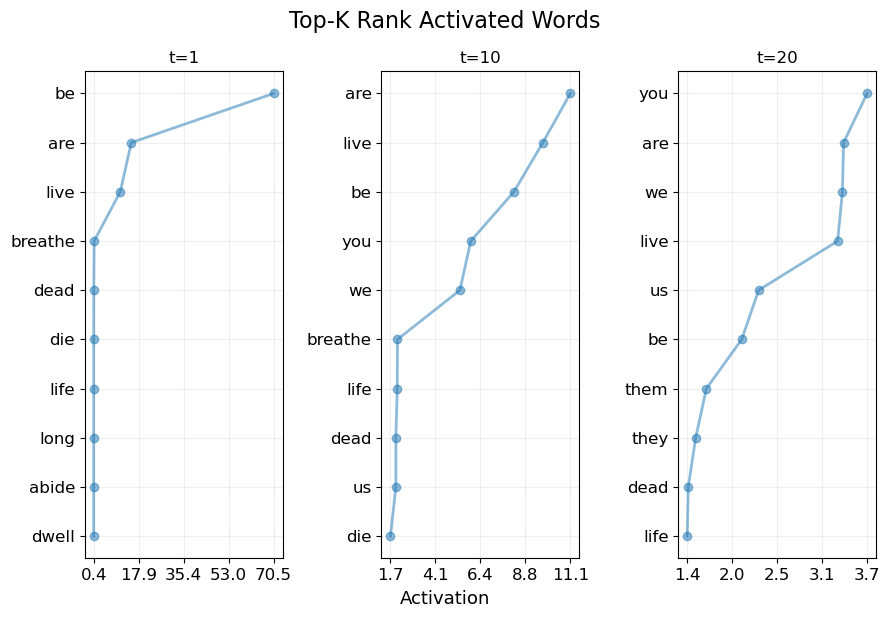

In [20]:
first_iter = model.rank_status_activation(results[1]['status'])
first_iter = dict(list(first_iter.items())[:10])

middle_iter = model.rank_status_activation(results[10]['status'])
middle_iter = dict(list(middle_iter.items())[:10])

final_iter = model.rank_status_activation(results[-1]['status'])
final_iter = dict(list(final_iter.items())[:10])

model.plot_top_k_rank(first_iter, middle_iter, final_iter, timelist=[1,10,20],
                     figname=path+'toy_data/mental_lexicon_2/res/ex_top_k_rank_activated.png')

time series of the actived nodes

In [21]:
node_activation = model.node_activation_series(results)

In [22]:
node_activation['be']

[100,
 70.5,
 51.1179561483864,
 38.067341342798315,
 29.04941705726626,
 22.65201939283171,
 17.995547624899334,
 14.523322446652388,
 11.87661918465792,
 9.819606190734051,
 8.19385978422299,
 6.890519703080535,
 5.833043009737535,
 4.966379072627545,
 4.250072200157669,
 3.6537931216945334,
 3.1543911364470474,
 2.7339116080223285,
 2.3782357346821374,
 2.076128188653639]

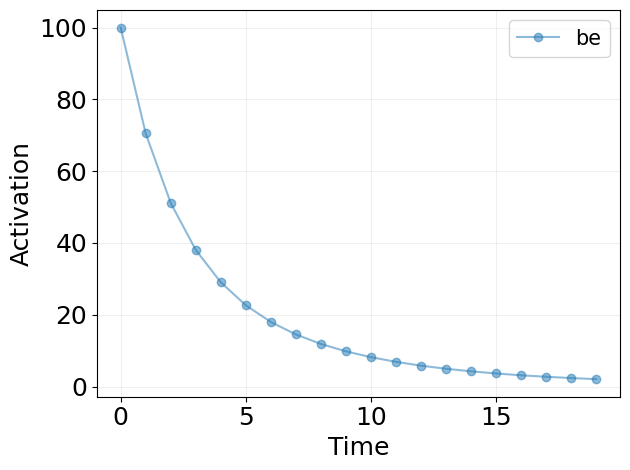

In [23]:
model.plot_activated_series(node_activation, time, ['be'])

In [24]:
node_activation['bee']

[0,
 1.4225774136001523e-06,
 1.3229324845566225e-05,
 5.7935837537022734e-05,
 0.0001702239109017391,
 0.00039098632358635006,
 0.0007604892647878183,
 0.0013128858561775687,
 0.002072878306709717,
 0.0030544373402184243,
 0.004261091644364156,
 0.005687217182631318,
 0.007319830007173224,
 0.009140515114119953,
 0.011127253152591535,
 0.013256012817466032,
 0.015502053557943245,
 0.017840933371094433,
 0.02024924561053441]

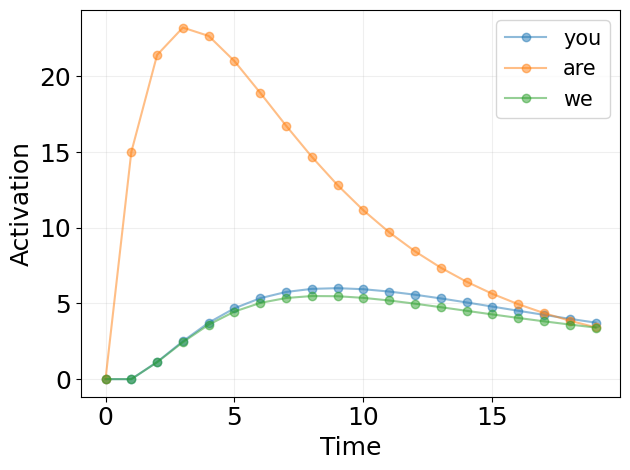

In [25]:
model.plot_activated_series(node_activation, time, ['you', 'are', 'we'],
                           figname=path+'toy_data/mental_lexicon_2/res/ex_node_activation.png')

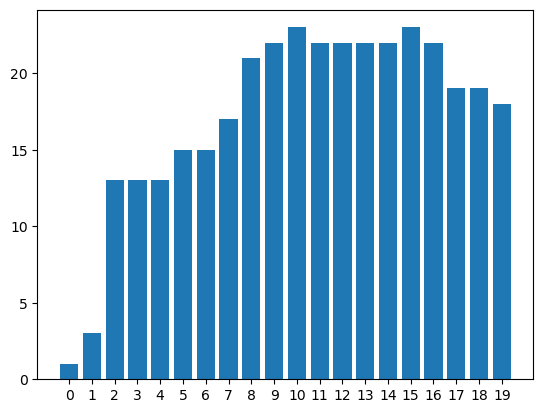

[1, 3, 13, 13, 13, 15, 15, 17, 21, 22, 23, 22, 22, 22, 22, 23, 22, 19, 19, 18]

In [26]:
activated_nodes = []
for it in range(time):
    count_n = model.count_status_activation(results[it]['status'], th=0.7)
    activated_nodes.append(count_n)
    
plt.bar(range(time),activated_nodes)
plt.xticks(range(time),range(time))

plt.show()

activated_nodes